In [31]:
# Pipeline (first cell)
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.data import morningstar as mstar
from quantopian.pipeline.data.zacks import EarningsSurprises
from quantopian.pipeline.data.morningstar import Fundamentals

def alpha_factor_function():
    return EarningsSurprises.eps_pct_diff_surp.latest

def make_pipeline():
    return Pipeline(columns={'column_name': alpha_factor_function()
                            },
                    screen=(alpha_factor_function().notnan()))

my_pipe = make_pipeline()

pipeline_data = run_pipeline(my_pipe, start_date='2014-1-1', end_date='2016-1-1').dropna()

Dropped 0.7% entries from factor data: 0.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-9909.68,-11.54,-132.003612,383.858508,352008,20.095715
2,-18.60,0.00,-3.724664,4.269292,439417,25.085790
3,0.22,6.98,3.403754,1.590594,260935,14.896467
4,5.26,25.00,12.849021,4.766205,351450,20.063860
5,20.00,7300.00,118.368636,275.407720,347847,19.858169


Returns Analysis


,1D,5D,10D
Ann. alpha,0.123,0.081,0.069
beta,-0.033,-0.071,-0.090
Mean Period Wise Return Top Quantile (bps),1.118,0.235,-0.126
Mean Period Wise Return Bottom Quantile (bps),-4.343,-3.813,-3.996
Mean Period Wise Spread (bps),5.461,4.071,3.893


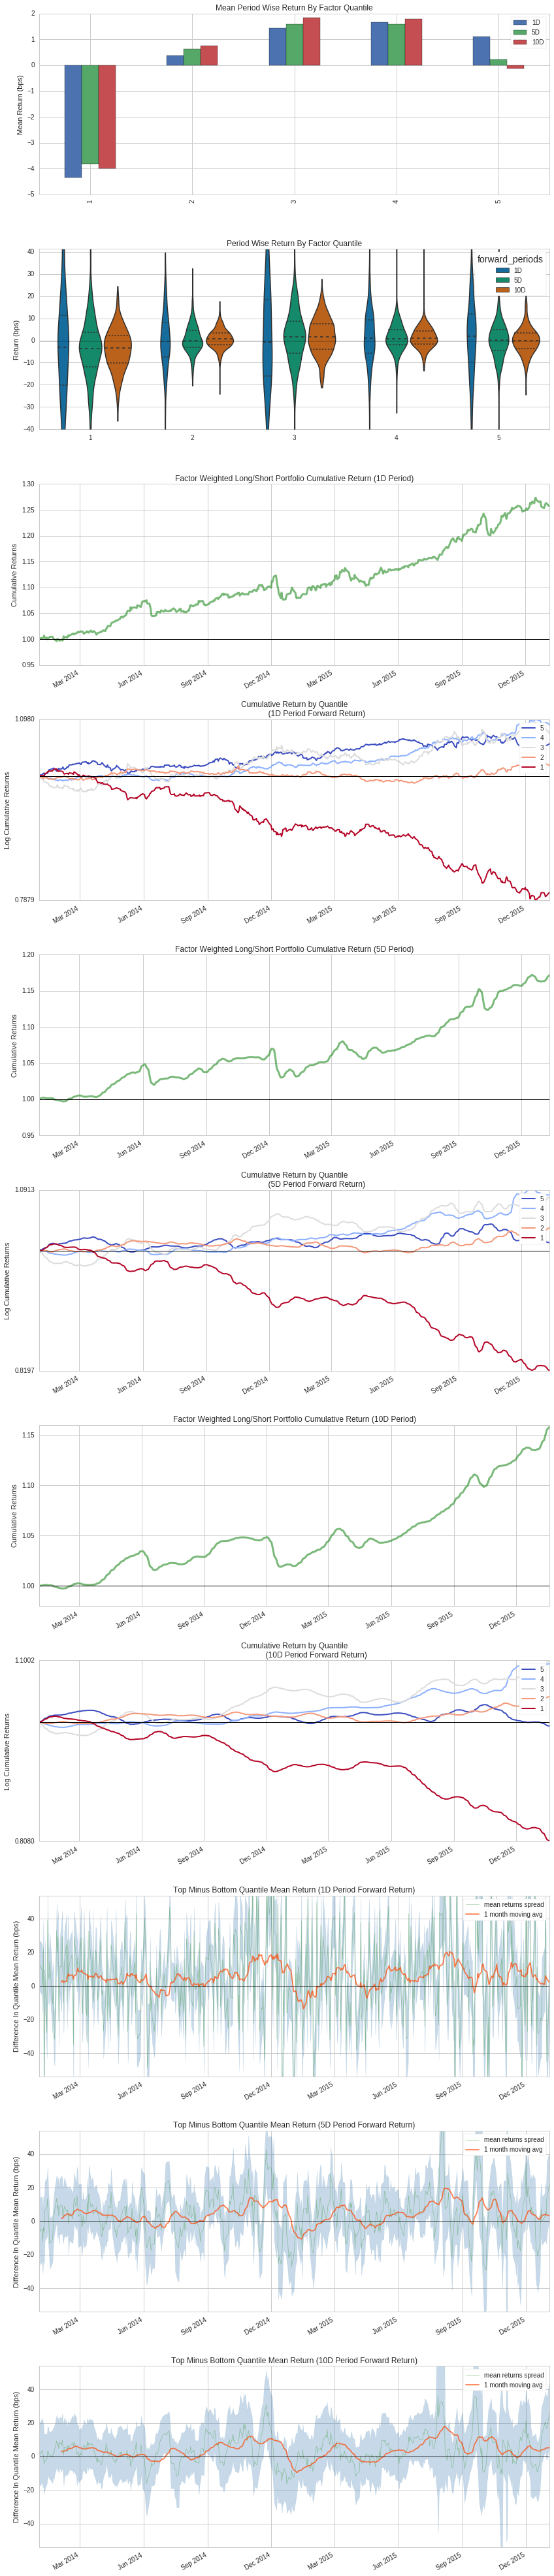

Information Analysis


,1D,5D,10D
IC Mean,0.010,0.015,0.018
IC Std.,0.032,0.033,0.032
Risk-Adjusted IC,0.312,0.469,0.562
t-stat(IC),7.013,10.532,12.632
p-value(IC),0.000,0.000,0.000
IC Skew,-0.113,-0.064,0.109
IC Kurtosis,-0.072,-0.518,-0.535


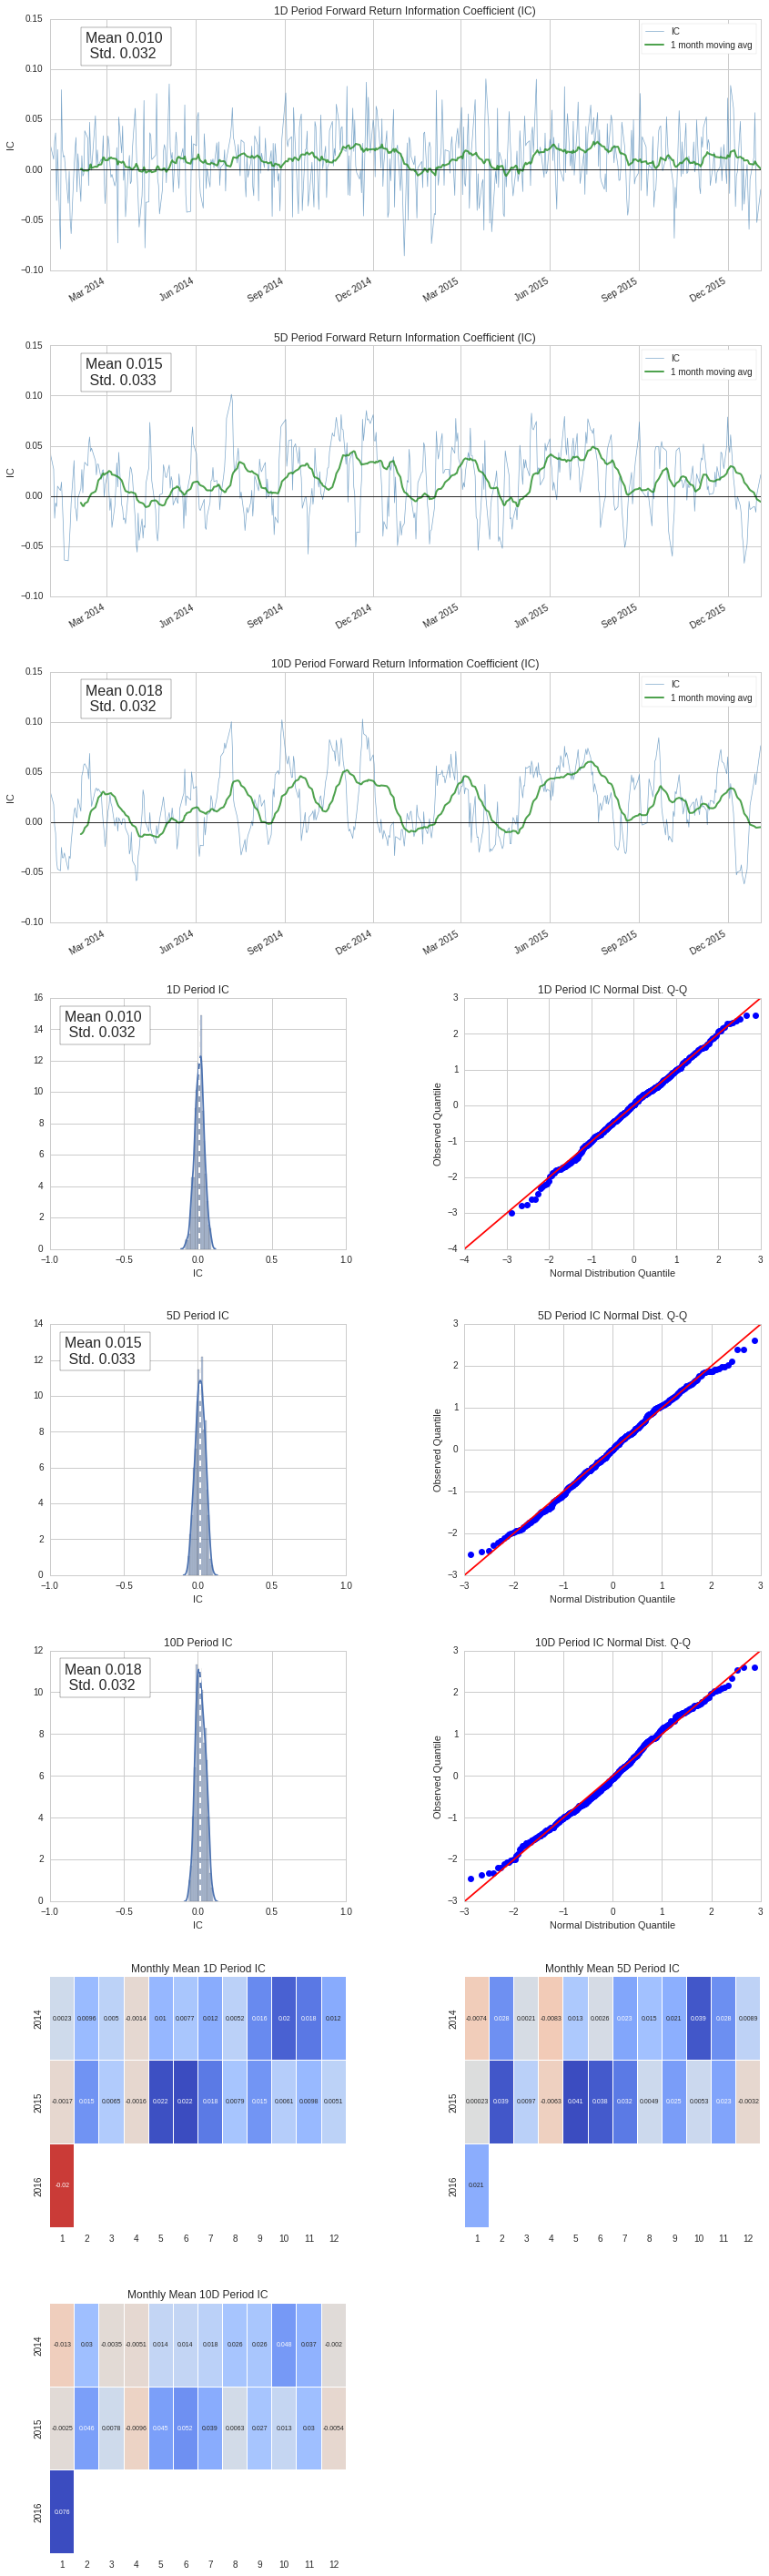

Turnover Analysis


,10D,1D,5D
Quantile 1 Mean Turnover,0.113,0.016,0.058
Quantile 2 Mean Turnover,0.113,0.014,0.058
Quantile 3 Mean Turnover,0.120,0.015,0.062
Quantile 4 Mean Turnover,0.128,0.018,0.067
Quantile 5 Mean Turnover,0.110,0.014,0.056


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.988,0.94,0.878


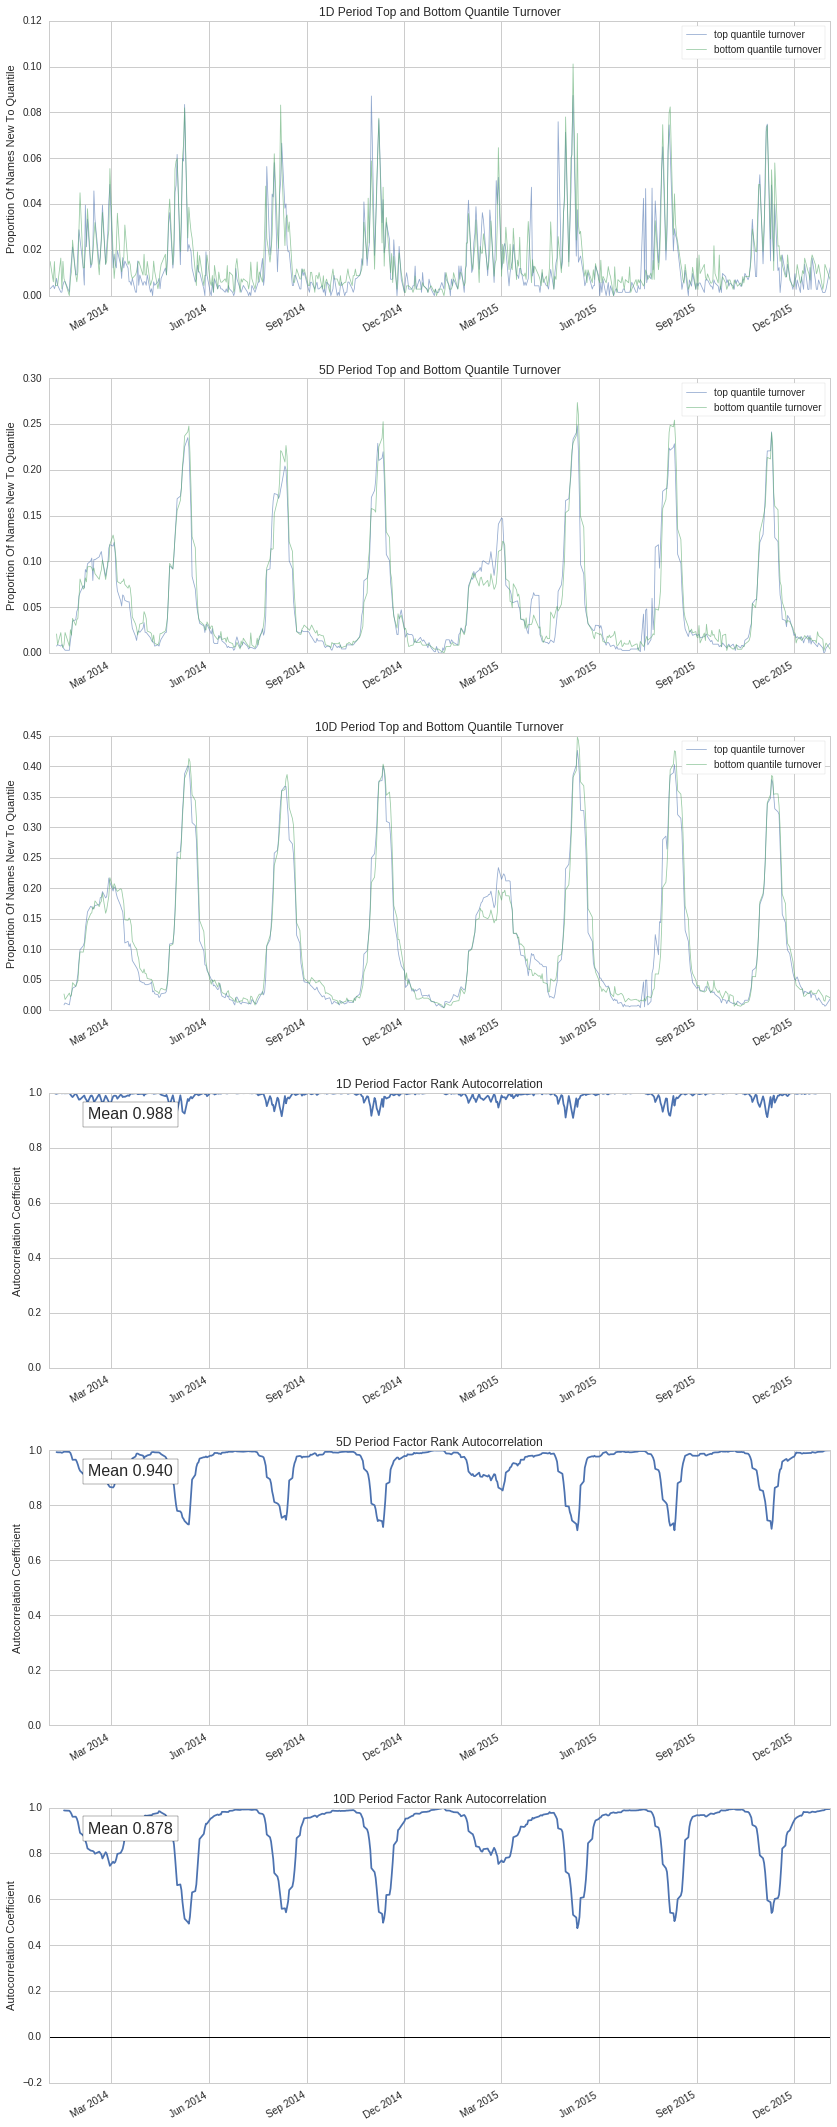

In [32]:
# Alphalens (second cell)

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

pricing_data = get_pricing(
  symbols=pipeline_data.index.levels[1], # Finds all assets that appear at least once in the pipeline
  start_date='2014-1-1',
  end_date='2016-2-1', #1 trading day after end date of pipeline
  fields='open_price'
)

merged_data = get_clean_factor_and_forward_returns(
  factor=pipeline_data['column_name'],
  prices=pricing_data
)

create_full_tear_sheet(merged_data)